## Liver CT scans analysis- Maayan Sapir Parsai

Raiologists marked liver's ROIs on a CT scan (The csv  'taggers_data_for_test.csv'):

![](https://drive.google.com/uc?export=view&id=1Cggf1smqoIMFAAKHJKb7CVwi9m3mI0YE)



The csv includes the following columns:
1. **series_id:** a unique id for a CT scan, each series contains many slices
2. **slice_id:** the id of a single image in a specific series
3. **tagger:** the radiologist that tagged the slice or the series
4. **label_name:** the label that the tagger marked on the specific slice/series
5. **value:** additional data for some of the labels

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# make sure the data was uploaded correctly
df=pd.read_csv('taggers_data_for_test.csv')
df.head()

,series_id,slice_id,label_name,tagger,value
0,214.979698817.18529.22496.43741.128330521668900,214.3447682240.35670.20720.36153.67854256781311,Liver_partially_present,tagger_a,NaN
1,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
2,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
3,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
4,214.979698817.18529.22496.43741.128330521668900,214.4038086146.5536.20999.34509.95120164927740,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."


In [47]:
# column names
df.columns

Index(['series_id', 'slice_id', 'label_name', 'tagger', 'value'], dtype='object')

In [48]:
# shape of the data
df.shape

(9039, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   series_id   9039 non-null   object
 1   slice_id    9039 non-null   object
 2   label_name  9039 non-null   object
 3   tagger      9039 non-null   object
 4   value       8909 non-null   object
dtypes: object(5)
memory usage: 353.2+ KB


In [50]:
# count missing values
df.isnull().sum()

series_id       0
slice_id        0
label_name      0
tagger          0
value         130
dtype: int64

In [51]:
#how many series id's were tagged
df['series_id'].nunique()

49

In [52]:
# how many taggers
df['tagger'].nunique()

3

In [53]:
# how many series each radiologist tagged
df.groupby(by="tagger").series_id.nunique() 

tagger
tagger_a    42
tagger_b    42
tagger_c    43
Name: series_id, dtype: int64

In [54]:
# How many series were tagged by all taggers 
df.groupby(by="tagger").series_id.nunique().sum()

127

In [55]:
# series that were tagged by all three taggers=36
df_grouped=df.groupby(by='series_id').tagger.nunique()==3
df_grouped[df_grouped==True].count()

36

##### Calculating the ground truth for liver:
There are 3 possible labels in the data: <br>
- Liver_partially_present <br> 
- Liver_present <br> 
- Liver_not_present

I need to get the ground truth for each series.<br>
I used the majority to decide.<br>
I used the label that at least 2 taggers chose. if there is no majority, I will fill 'unknown'

In [56]:
# subset the data relevant for the question, view different label names
label_data= df[['series_id','label_name','tagger']]
label_data
label_data['label_name'].unique()

array(['Liver_partially_present', 'Liver_ROI', 'Liver_present',
       'Liver_not_present'], dtype=object)

In [57]:
# subset only label names that are relevant for this question
label_list=['Liver_partially_present','Liver_present','Liver_not_present']
label_data=label_data.loc[label_data['label_name'].isin(label_list)]
label_data.head()

,series_id,label_name,tagger
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a
43,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_c
80,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_b
156,214.905166805.4334.21023.36959.242484179916872,Liver_partially_present,tagger_a
208,214.905166805.4334.21023.36959.242484179916872,Liver_partially_present,tagger_c


In [58]:
# for each series, how many taggers labeld what
label_data.groupby(by=['series_id','label_name']).tagger.nunique().head()

series_id                                         label_name             
214.1010318896.47235.23108.38196.63500836030298   Liver_present              3
214.1136906659.42173.21294.39595.80934666869483   Liver_not_present          1
                                                  Liver_partially_present    1
214.1137687545.3421.22033.38093.120614205891159   Liver_present              3
214.1144225571.17167.24195.43423.192235341247362  Liver_present              3
Name: tagger, dtype: int64

In [59]:
# transform the count result into a count column in the dataframe
label_data['count_label']=label_data.groupby(by=['series_id','label_name']).tagger.transform('nunique')
label_data.head()

,series_id,label_name,tagger,count_label
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a,3
43,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_c,3
80,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_b,3
156,214.905166805.4334.21023.36959.242484179916872,Liver_partially_present,tagger_a,2
208,214.905166805.4334.21023.36959.242484179916872,Liver_partially_present,tagger_c,2


In [60]:
# sort the data by count_label, cases where there is an agreement will be on top, unknown cases on the bottom
label_data.sort_values(by='count_label', ascending=False, inplace=True)
label_data.head()

,series_id,label_name,tagger,count_label
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a,3
5201,214.2511097769.62855.23129.47790.216783088310797,Liver_partially_present,tagger_b,3
6798,214.1509699221.4433.21997.45633.122327039602655,Liver_present,tagger_b,3
6730,214.1509699221.4433.21997.45633.122327039602655,Liver_present,tagger_a,3
6083,214.2259084259.38080.21430.37606.262799886945186,Liver_present,tagger_c,3


In [61]:
# drop duplicates, so that cases where two taggers agreed and one disagreed, will be marked by the majority 
label_data=label_data.drop_duplicates(subset='series_id', keep='first')
label_data.head()

,series_id,label_name,tagger,count_label
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a,3
5201,214.2511097769.62855.23129.47790.216783088310797,Liver_partially_present,tagger_b,3
6798,214.1509699221.4433.21997.45633.122327039602655,Liver_present,tagger_b,3
6083,214.2259084259.38080.21430.37606.262799886945186,Liver_present,tagger_c,3
5914,214.2327811651.16923.24161.39752.252351752931302,Liver_present,tagger_c,3


In [62]:
# double check the data in excel
#temp.to_excel('temp_df_excel.xlsx')

In [63]:
# if there are 2 or more taggers that agreed on the label, ground truth=label name, if only one ground truth='unknown'
label_data.loc[label_data["count_label"] == 3, "count_label"] = label_data['label_name']
label_data.loc[label_data["count_label"] == 2, "count_label"] = label_data['label_name']
label_data.loc[label_data["count_label"] == 1, "count_label"] = 'unknown'

# make sure the unknown label was insert correctly
label_data['count_label'].unique()

array(['Liver_partially_present', 'Liver_present', 'unknown'],
      dtype=object)

In [64]:
# view the results
label_data.head()

,series_id,label_name,tagger,count_label
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a,Liver_partially_present
5201,214.2511097769.62855.23129.47790.216783088310797,Liver_partially_present,tagger_b,Liver_partially_present
6798,214.1509699221.4433.21997.45633.122327039602655,Liver_present,tagger_b,Liver_present
6083,214.2259084259.38080.21430.37606.262799886945186,Liver_present,tagger_c,Liver_present
5914,214.2327811651.16923.24161.39752.252351752931302,Liver_present,tagger_c,Liver_present


In [65]:
# change the column name to something more informative: 'ground_truth'
label_data2=label_data.rename(columns={'count_label':'ground_truth'})
label_data2.head()

,series_id,label_name,tagger,ground_truth
0,214.979698817.18529.22496.43741.128330521668900,Liver_partially_present,tagger_a,Liver_partially_present
5201,214.2511097769.62855.23129.47790.216783088310797,Liver_partially_present,tagger_b,Liver_partially_present
6798,214.1509699221.4433.21997.45633.122327039602655,Liver_present,tagger_b,Liver_present
6083,214.2259084259.38080.21430.37606.262799886945186,Liver_present,tagger_c,Liver_present
5914,214.2327811651.16923.24161.39752.252351752931302,Liver_present,tagger_c,Liver_present


Text(0.5, 1.0, 'Count of Ground Truth by Label Type')

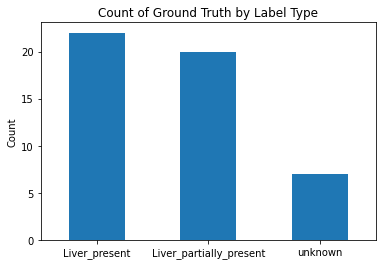

In [66]:
# visualize the data
label_data2['ground_truth'].value_counts().plot(kind='bar', rot=360)
plt.ylabel('Count')
plt.title('Count of Ground Truth by Label Type')

### Next up, calculate HU ground truth:

Hounsfield unit by Wikipedia:<br>
The Hounsfield scale, is a quantitative scale for describing radiodensity. It is frequently used in CT scans.

The Hounsfield unit (HU) scale is a linear transformation of the original linear attenuation coefficient measurement into one in which the radiodensity of distilled water at standard pressure and temperature (STP) is defined as 0 Hounsfield units (HU), while the radiodensity of air at STP is defined as −1000 HU

https://en.wikipedia.org/wiki/Hounsfield_scale


In the data we can see a  "Liver_ROI" label, this label represent a circle that the tagger tagged on a slice. <br>
at the value column I can find a json that stores the mean HU in a single circle (the "mean" key)

For each series a tagger tagged multiple circles on multiple slices.

##### I calculated the mean HU for the entire series per tagger

In [67]:
# Use the following code to extract the mean from the value field:
import json

def extract_mean(row):
    value_dict = json.loads(row.value.replace("'", "\""))
    return value_dict['features'][0]['properties']['mean']

In [68]:
# subset to only data with ROI labeling 
label_list_2=['Liver_ROI']
only_roi=df.loc[df['label_name'].isin(label_list_2)]
# make sure only Liver_ROI remained 
only_roi['label_name'].unique()

array(['Liver_ROI'], dtype=object)

In [69]:
# configure the new df
only_roi=only_roi.reset_index().drop(['index'],axis=1)
only_roi.head()

,series_id,slice_id,label_name,tagger,value
0,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
1,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
2,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
3,214.979698817.18529.22496.43741.128330521668900,214.4038086146.5536.20999.34509.95120164927740,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."
4,214.979698817.18529.22496.43741.128330521668900,214.2001189455.63976.23211.36752.174994682803839,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t..."


In [70]:
# create a for loop to apply the extract mean function, and create a new column 'mean' 
only_roi['mean_HU']=999999
for i in range(len(only_roi)):
    only_roi.loc[i,'mean_HU']=extract_mean(only_roi.iloc[i])

In [71]:
only_roi.head()

,series_id,slice_id,label_name,tagger,value,mean_HU
0,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",7.004211
1,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",2.328067
2,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",-2.798460
3,214.979698817.18529.22496.43741.128330521668900,214.4038086146.5536.20999.34509.95120164927740,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",7.011620
4,214.979698817.18529.22496.43741.128330521668900,214.2001189455.63976.23211.36752.174994682803839,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",-6.056106


In [72]:
# calculate the mean HU for the entire series per tagger
only_roi.groupby(by=['series_id','tagger']).mean_HU.mean().head(20)

series_id                                         tagger  
214.1010318896.47235.23108.38196.63500836030298   tagger_a    30.280651
                                                  tagger_b    32.242964
                                                  tagger_c    31.582720
214.1136906659.42173.21294.39595.80934666869483   tagger_b    96.810944
214.1137687545.3421.22033.38093.120614205891159   tagger_a    34.874288
                                                  tagger_b    36.667500
                                                  tagger_c    35.307963
214.1144225571.17167.24195.43423.192235341247362  tagger_a    13.336099
                                                  tagger_b    12.821675
                                                  tagger_c    10.715167
214.120374168.10221.21922.38059.275967605125871   tagger_a    33.412546
                                                  tagger_b    33.045494
                                                  tagger_c    32.618512
214.1

#### Now that each series have mean HU of the liver per tagger, I want to provide descriptive statistics about the difference between the taggers .

In [73]:
#  descriptive statistics about the difference between the HU of the taggers 
only_roi.groupby(by='tagger')['mean_HU'].describe()

,count,mean,std,min,25%,50%,75%,max
tagger,,,,,,,,
tagger_a,2781.0,43.202611,16.710231,-6.056106,31.378981,43.135632,56.729015,90.579365
tagger_b,3116.0,43.168132,17.403819,-5.257435,31.086104,41.265315,58.929548,100.223214
tagger_c,3012.0,43.979993,16.625447,-2.809806,32.151819,44.380908,58.182510,83.990431


##### Next step is to calculate the ground truth of the liver HU by the mean of the three taggers.

In [74]:
# calculate the mean HU for the entire series and slice per tagger
only_roi.groupby(by=['series_id','slice_id','tagger']).mean_HU.mean()

series_id                                        slice_id                                         tagger  
214.1010318896.47235.23108.38196.63500836030298  214.1148306727.8891.23921.39072.42804913601679   tagger_b    34.187024
                                                                                                  tagger_c    32.338571
                                                 214.1542396973.29287.23535.34381.33601994991890  tagger_b    33.653714
                                                                                                  tagger_c    33.167800
                                                 214.1547323029.29771.23286.42861.28454969437629  tagger_a    31.075658
                                                                                                                ...    
214.979698817.18529.22496.43741.128330521668900  214.372301710.19276.23274.32881.163076560606322  tagger_a     1.225145
                                                     

In [75]:
# the ground truth of liver by averaging the entire ratings 
only_roi.groupby(by=['series_id','tagger']).mean_HU.mean().mean()

43.235450624691

In [76]:
# add a column to the data for a mean score by tagger per series
new=only_roi
new['mean_by_tagger']= new.groupby(by=['series_id','tagger']).mean_HU.transform('mean')
new.head()

,series_id,slice_id,label_name,tagger,value,mean_HU,mean_by_tagger
0,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",7.004211,2.250029
1,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",2.328067,2.250029
2,214.979698817.18529.22496.43741.128330521668900,214.3342698736.25043.20913.43865.219498800052639,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",-2.798460,2.250029
3,214.979698817.18529.22496.43741.128330521668900,214.4038086146.5536.20999.34509.95120164927740,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",7.011620,2.250029
4,214.979698817.18529.22496.43741.128330521668900,214.2001189455.63976.23211.36752.174994682803839,Liver_ROI,tagger_a,"{'type': 'FeatureCollection', 'features': [{'t...",-6.056106,2.250029


In [77]:
#new.to_excel('new_df_excel.xlsx')

In [78]:
# get the ground truth per series by averaging the taggers mean_HU per series
new_2=new.groupby(by=['series_id']).mean_by_tagger.mean()
new_2.head()

series_id
214.1010318896.47235.23108.38196.63500836030298     31.413983
214.1136906659.42173.21294.39595.80934666869483     96.810944
214.1137687545.3421.22033.38093.120614205891159     35.825065
214.1144225571.17167.24195.43423.192235341247362    12.306589
214.120374168.10221.21922.38059.275967605125871     33.013589
Name: mean_by_tagger, dtype: float64

In [79]:
# transform the series to a df
new_2=new_2.to_frame()

In [80]:
# another metric to calculate the ground truth- min
new_3=new.groupby(by=['series_id']).mean_by_tagger.min()
new_3.head()

series_id
214.1010318896.47235.23108.38196.63500836030298     30.280651
214.1136906659.42173.21294.39595.80934666869483     96.810944
214.1137687545.3421.22033.38093.120614205891159     34.874288
214.1144225571.17167.24195.43423.192235341247362    10.715167
214.120374168.10221.21922.38059.275967605125871     32.618512
Name: mean_by_tagger, dtype: float64

In [81]:
# another metric to calculate the ground truth- median
new_4=new.groupby(by=['series_id']).mean_by_tagger.median()
new_4.head()

series_id
214.1010318896.47235.23108.38196.63500836030298     31.582720
214.1136906659.42173.21294.39595.80934666869483     96.810944
214.1137687545.3421.22033.38093.120614205891159     35.307963
214.1144225571.17167.24195.43423.192235341247362    12.821675
214.120374168.10221.21922.38059.275967605125871     33.045494
Name: mean_by_tagger, dtype: float64

### Upload the second data file ('algo_data_for_test.csv')
This file contains the prediction of the liver's HU by an algorithm

##### Create a scatter plot
The x axis is the mean of the ground truth and the algorithm result <br>
The y axis is the algorithm result

In [82]:
# read the algo results file
df2=pd.read_csv('algo_data_for_test.csv')
df2.head()

,series_id,algo_result
0,214.1010318896.47235.23108.38196.63500836030298,30.671555
1,214.1136906659.42173.21294.39595.80934666869483,94.710944
2,214.1137687545.3421.22033.38093.120614205891159,34.761667
3,214.1144225571.17167.24195.43423.192235341247362,13.836980
4,214.120374168.10221.21922.38059.275967605125871,34.469937


In [83]:
# merge the two files
df_merged= new_2.merge(df2,on='series_id', how='inner')
df_merged.head()

,series_id,mean_by_tagger,algo_result
0,214.1010318896.47235.23108.38196.63500836030298,31.413983,30.671555
1,214.1136906659.42173.21294.39595.80934666869483,96.810944,94.710944
2,214.1137687545.3421.22033.38093.120614205891159,35.825065,34.761667
3,214.1144225571.17167.24195.43423.192235341247362,12.306589,13.836980
4,214.120374168.10221.21922.38059.275967605125871,33.013589,34.469937


In [84]:
# calculate a new column for the mean algo and ground truth results
df_merged['gt_algo_mean']= (df_merged['mean_by_tagger']+df_merged['algo_result'])/2
df_merged.head()

,series_id,mean_by_tagger,algo_result,gt_algo_mean
0,214.1010318896.47235.23108.38196.63500836030298,31.413983,30.671555,31.042769
1,214.1136906659.42173.21294.39595.80934666869483,96.810944,94.710944,95.760944
2,214.1137687545.3421.22033.38093.120614205891159,35.825065,34.761667,35.293366
3,214.1144225571.17167.24195.43423.192235341247362,12.306589,13.836980,13.071785
4,214.120374168.10221.21922.38059.275967605125871,33.013589,34.469937,33.741763


<AxesSubplot:xlabel='gt_algo_mean', ylabel='algo_result'>

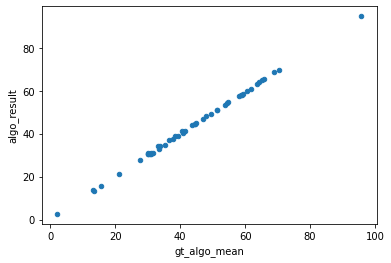

In [85]:
#The x axis is the mean of the gt and algorithm result, The y axis is the algorithm result
# the model seems like a very good fit
df_merged.plot(x="gt_algo_mean", y="algo_result", kind="scatter")